In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import scipy.optimize as opt
import seaborn as sns

In [2]:
n_trials = 1
p_success = 0.5

In [3]:
training_data = pd.DataFrame(data={"x":np.random.binomial(n=n_trials,p=p_success,size=1000)})

In [4]:
training_data

,x
0,0
1,0
2,0
3,1
4,0
...,...
995,1
996,1
997,1
998,1


(array([494.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 506.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

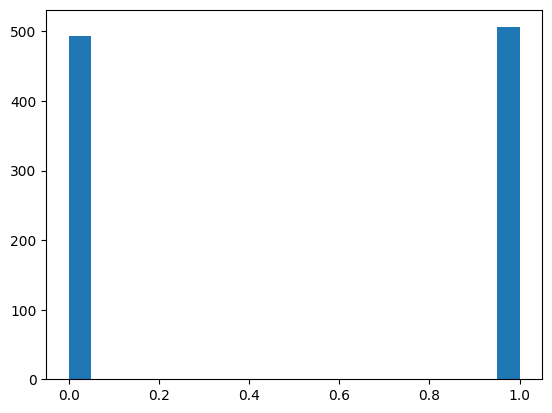

In [5]:
plt.hist(training_data,bins=20)

In [6]:
def del_by_del_nll(p_initial):

    del_by_del_p = np.mean(training_data/p_initial) - np.mean(1-training_data)/(1-p_initial)

    return[del_by_del_p]

In [7]:
def nll(p):

    log_pdf = s.bernoulli.logpdf(training_data,p)
    return -np.mean(log_pdf)

In [8]:
epsilon = 10**(-2)
epoch_counter = 0
p_initial = 1
tol = 10**(-6)

while True:

    initial_gradients = del_by_del_nll(p_initial)

    p_final = p_initial - (epsilon * initial_gradients)

    nll_initial_value = nll(p_initial)
    nll_final_value = nll(p_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1
    p_initial = p_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

/tmp/ipykernel_5237/869836062.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  del_by_del_p = np.mean(training_data/p_initial) - np.mean(1-training_data)/(1-p_initial)


TypeError: can't multiply sequence by non-int of type 'float'